# Cyfrowe Przetwarzanie Sygnałów
**Laboratorium nr 8 Filtry specjalne: Hilberta, różniczkujący, interpolatora, decymatora**
prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat

Python/colab: Mateusz Potaśnik


---





# 1. Filtr Hilberta, demodulacja AM (1+0.25 pkt)
Zarejestrowano sygnał sinusoidalny $x$, zmodulowany amplitudowo, o następujących parametrach:
czas trwania $t$=1 s, częstotliwość próbkowania $f_s$=1000 Hz, częstotliwość nośna $f_c$=200 Hz. Sygnałem
modulującym amplitudę była suma trzech sygnałów sinusoidalnych i stałej wyrażona zależnością:

$$m(t)=1+ A_1cos(2 π f_1t)+A_2cos(2 π f_2t)+A_3cos(2π f_3t)$$



Wyznacz parametry $A_1, A_2, A_3, f_1, f_2, f_3$. Sygnał $x$ do analizy znajduje się w pliku `lab08_am.mat`. Wybierz
numer realizacji sygnału, odpowiadającej przedostatniej cyfrze Twojej legitymacji studenckiej.

>**Wskazówki:** Na rysunku przedstawiono sygnał $x$ oraz
jego transformację Hilberta $HT(x)$ (wyjście z filtru
Hilberta, będącego przesuwnikiem fazowym o $-\frac{π}{2}$
radianów). Wykorzystując oba sygnały wyznaczono
obwiednię sygnału $x$ (czerwona linia), która jest właśnie
sygnałem modulującym $m(t)$, czyli dokonano demodulacji
AM. Obwiednia to pierwiastek z sumy kwadratów
sygnałów $x$ i jego transformacji Hilberta $HT(x)$. Sygnał $x$
i $HT(x)$ muszą być odpowiednio zsynchronizowane, patrz
str. 353 w [TZ]. Dokonując analizy częstotliwościowej
sygnału obwiedni można w łatwy sposób wyznaczyć
parametry tego sygnału.

Transformację Hilberta wykonaj za pomocą filtru FIR.
Użycie funkcji `hilbert(...)`[1] lub podobnej oznacza
utratę 0.5 pkt. W tym celu musisz wyznaczyć odpowiedź
impulsową tego filtru. Rozważ użycie "okna" do
poprawy charakterystyki filtru. Patrz rys. 12.18 na str. 343 w [TZ].







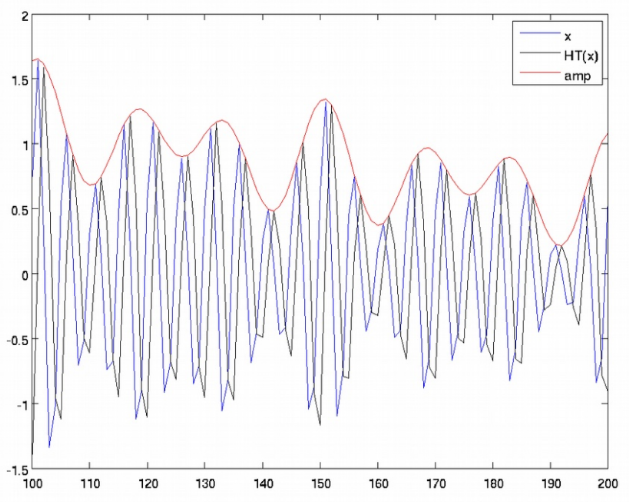


[1] funkcja `hilbert(...)` zwraca sygnał analityczny tj. zespolony, w którym część rzeczywista to analizowany sygnał, a część urojona to sygnał przefiltrowany filtrem Hilberta (przesunięty w fazie)

In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=1l6Sy4Mlk1Gyo0r75b18Yc8ypJGnY4byV','lab08_am.mat', quiet=False)
am = loadmat('lab08_am.mat')
s1 = am['s1'][0]



###**Opcjonalnie** (+0.25 pkt) 
Na końcu, znając parametry sygnału $m(t)$ oraz parametry modulacji, odtwórz próbki sygnału x i porównaj je z wczytanymi z pliku.

# 2. Filtr Hilberta, modulacja AM (2+0.5 pkt)
Poniżej przedstawiono 3 zależności opisujące różne typy modulacji AM (DSB - Double Side Band,
SSB - Single Side Band, C – Carrier oraz SC - Suppressed Carrier).

\begin{equation}
y_{DSB−C}(t)=(1+x(t)) cos(2π f_ct) \tag{DSB-C}
\end{equation}

\begin{equation}
y_{DSB−SC}(t)=x (t)cos(2πf_ct) \tag{DSB-SC}
\end{equation}

\begin{equation}
y_{SSB−SC}(t)=0.5 x(t)cos(2π f_ct)±0.5 x_H (t)sin(2 πf_ct) \tag{SSB-SC}
\end{equation}

gdzie $y(t)$ to sygnał radiowy o częstotliwości nośnej $f_c, x(t)$ to sygnał modulujący, a $x_H(t)$ jest wynikiem transformacji Hilberta sygnału $x(t)$. Wykorzystaj zaprojektowany filtr Hilberta, nie używaj funkcji
`hilbert(...)` lub podobnej z Matlaba lub Pythona. Modulacja SSB-SC jest w dwóch wariantach: ze wstęgą boczną po lewej oraz prawej stronie częstotliwości nośnej, odpowiednio dla znaku "+" oraz "–" we wzorze. W wersji cyfrowej, częstotliwość próbkowania sygnału radiowego $y_{xxx}(t)$ wynosi $f_s$.

Wygeneruj 3 sygnały radiowe, w każdym po dwie stacje, modulowane AM, dla każdego sygnału radiowego użyj innej modulacji. Parametry sygnału:

- częstotliwość próbkowania sygnału radiowego $f_s$ = 400 kHz,
- częstotliwość nośna pierwszej stacji $f_{c1}$ = 100 kHz (sygnał $x_1(n)$ to `mowa8000.wav`),
- częstotliwość nośna drugiej stacji $f_{c2}$ = 110 kHz (sygnał $x_2(n)$ to nagranie `mowa8000.wav` puszczone od tyłu),
- głębokość modulacji dla obu stacji $dA$ = 0.25.

Stacje dla modulacji SSB-SC powinny być w różnych wersjach (jedna z widmem po prawej stronie nośnej, druga po lewej stronie nośnej).

>**Uwaga:** w celu uzyskania poprawnej modulacji AM za pomocą powyższych zależności, sygnał modulujący $x(t)$ musi zostać odpowiednio nadpróbkowany: jeżeli częstotliwość próbkowania tego
sygnału wynosi $f_{sx}$ a częstotliwość próbkowania sygnału wyjściowego $y_{xxx}(t)$ jest równa $f_s$, to sygnał modulujący należy nadpróbkować $\frac{f_s}{f_{sx}}$ razy.


In [ ]:
from scipy.io import wavfile
import gdown
gdown.download('https://drive.google.com/uc?export=download&id=1ttTambJ_T34EkvXh7_u6SyqerHWLQ-S0', 'mowa8000.wav', quiet=False)
sample_rate, data = wavfile.read('mowa8000.wav')



###**Opcjonalnie** (+0.25 pkt):
wykonaj demodulację wszystkich 3 transmisji (każda zawiera dwie
stacje więc otrzymasz 6 sygnałów audio). Sprawdź jakość transmisji. Nie zapomnij odwrócić próbek dźwiękowych z częstotliwości $f_{c2}$. Demodulację wykonaj podobnie jak w ćwiczeniu 1a, tzn. z wykorzystaniem filtru Hilberta.


###**Opcjonalnie** (+0.25 pkt): 
sprawdź czy da się umieścić dwie stacje na jednej częstotliwości nośnej za pomocą modulacji SSB-SC (wykonaj modulację i demodulację).

# 3. Filtr interpolatora i decymatora cyfrowego, mikser audio (2+0.5 pkt)

Na poniższym rysunku przedstawiono fragmenty trzech sygnałów sinusoidalnych $x1, x2$ oraz $x3$ o następujących parametrach:

- $x_1: f_1$=1001.2 Hz,$\quad f_{s1}$= 8000 Hz,$\quad t$=1 s
- $x_2: f_2$= 303.1 Hz,$\quad f_{s2}$= 32000 Hz,$\quad t$=1 s
- $x_3: f_3$=2110.4 Hz,$\quad f_{s3}$= 48000 Hz,$\quad t$=1 s

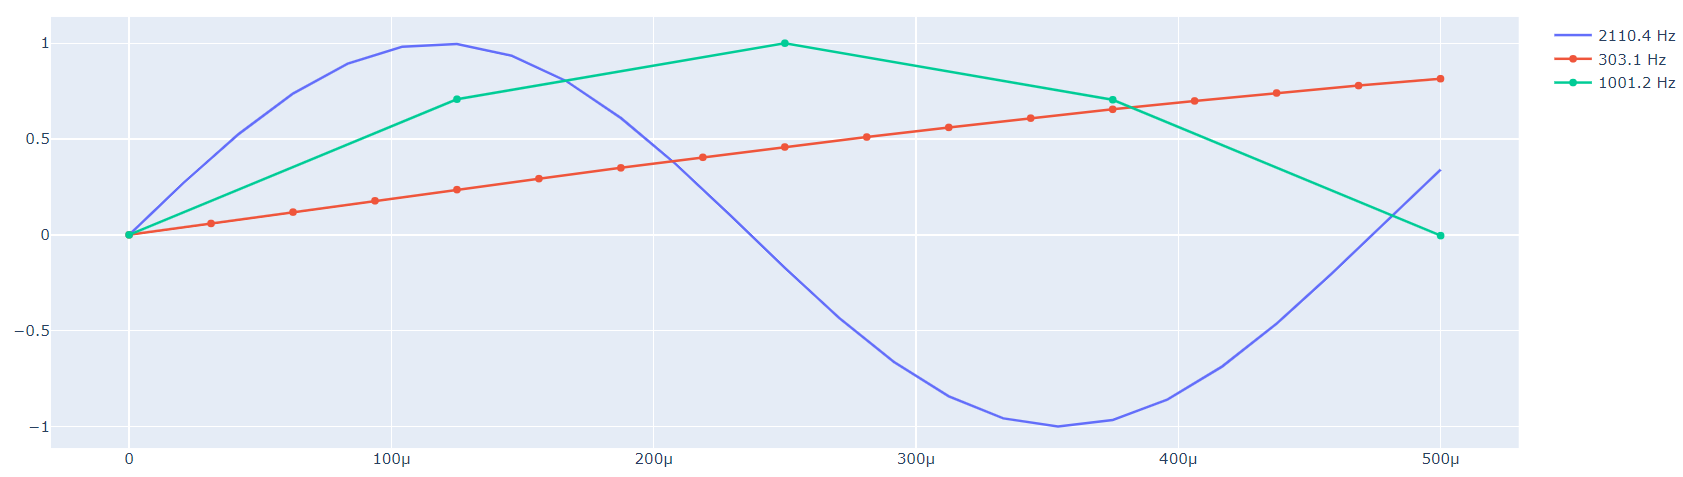

Częstotliwości próbkowania wszystkich sygnałów są typowe dla nagrań audio. Zakładając, że wszystkie 3 nagrania muszą być równocześnie odtworzone przez kartę dźwiękową, to należy je „połączyć”, tak aby uzyskać jeden sygnał będący sumą trzech składowych: $x_4 = x_1+x_2+x_3$. W tym celu wymagana jest zmiana częstotliwości próbkowania wszystkich sygnałów do jednej $f_{s3}$. Otrzymany
sygnał porównaj z analitycznie wygenerowanym (oczekiwanym) sygnałem $x ̄_4(n)$ :

$$x ̄_4(n)=sin(2π f_1t)+sin(2π f_2t)+sin(2 π f_3t) , \quad \textrm{gdzie} \quad t=0, d_{t4}, 2d_{t4}, ..., 1-d_{t4}    \quad \textrm{oraz} \quad    d_{t4}=\frac{1}{f_{s3}}$$

Jednym ze sposobów sumowania sygnałów cyfrowych o różnych częstotliwościach próbkowania jest ich nadpróbkowanie w celu uzyskania wspólnej częstotliwości próbkowania, a następnie wykonanie decymacja do docelowej częstotliwości jeżeli jest to potrzebne.

W związku z tym wykonaj:

- nadpróbkowanie sygnałów (wstawienie m zer pomiędzy każde dwie próbki sygnału
oryginalnego, ang. *upsampling*),
- interpolację za pomocą filtru interpolującego, mającego na celu wygładzenie sygnału,
- zastosowanie filtru decymującego[2], który można traktować jak filtr antyaliasingowy wymagany przed repróbkowaniem sygnału,
- decymację (wybranie co $n$-tej próbki)
- Wybierz optymalny sposób łączenia tych sygnałów wymagający wykonania najmniejszej liczby repróbkowań.

Odsłuchaj (na słuchawkach) wygenerowany sygnał $x_4$. Jeżeli repróbkowanie zostało błędnie wykonane, będą słyszalne zniekształcenia (stuki, kliki, etc...).

Następnie zmiksuj cyfrowo dwa sygnały rzeczywiste: użyj plików `x1.wav` i `x2.wav`, wykonaj repróbkowanie do częstotliwości 48000 Hz.

[2] filtr antyaliasingowy jest niezbędny gdy repróbkowanie spowoduje obniżenie częstotliwości próbkowania oryginalnego sygnału. W omawianym przypadku nie nastąpi taka sytuacja.



In [ ]:
from scipy.io import wavfile
import gdown

gdown.download('https://drive.google.com/uc?id=1TuLf83VDdk53ALZR8IcvPe5xwgm6iu85', 'x1.wav', quiet=False)
gdown.download('https://drive.google.com/uc?id=1u4lkSzY5PwbKKIaDTtMQOVnvEYh0hbIX', 'x2.wav', quiet=False)

fs_1, x_1 = wavfile.read('x1.wav')
fs_2, x_2 = wavfile.read('x2.wav')


###**Opcjonalnie:** (+0.25 pkt) 
wykonaj miksowanie sygnałów z plików `x1.wav` i `x2.wav` do częstotliwości CD-Audio.

Dodatkowo wykonaj miksowanie $x_4 = x_1+x_2+x_3$ sygnałów syntetycznych do częstotliwości $f_{s4}$=48000 Hz następującymi metodami:
- interpolacją liniową (lab04, TOwNiT),
- rekonstrukcją sygnału metodą splotu z $\frac{sin(x)}x$ (lab01 CPS).


###**Opcjonalnie:** (+0.25 pkt) 
sprawdź, jakich metod repróbkowania używa się w rzeczywistych, softwarowych mikserach dźwięku. Zaimplementuj jedną z nich (nietrywialną) i porównaj jej jakość z metodami użytymi poprzednio przez Ciebie. Przykłady znajdziesz między innymi w dokumentacji do PulseAudio (Linux).

# 4. Filtr różniczkujący, dekodowanie FM (opcjonalnie +1 pkt)

W pliku `lab08_fm.mat` znajdują się próbki sygnału radia FM, w którym zakodowano plik dźwiękowy `mowa8000.wav`. W celu przyspieszenia obliczeń, częstotliwość nośną ustawiono na $f_c=200$ kHz, natomiast sygnał radiowy spróbkowano częstotliwością $f_s=2$ MHz. Sygnał modulowany częstotliwościowo ma następująca postać (patrz plik `„Radio FM równania”` ze strony przedmiotu CPS lub program 22.7 ze strony 886-889 z [PWN-2014]):

\begin{equation}
x_{FM_{UP}} (t)=cos(2πf_ct +2 π K∫_0^tx(t)dt)=cos(2 πf_ct +φ(t)) . \tag{1}
\end{equation}

Demodulację takiego sygnału można wykonać na kilka sposobów.

**Pierwszy sposób**, którym się obecnie nie zajmujemy, został zastosowany w lab 06 i 07: obliczenie składowych $I(n)$ oraz $Q(n)$ sygnału (1):

\begin{equation}
I(n)=A /D[ LowPass( x_{FM _ {UP}}(t)cos(2 πf_ct ))] \tag{2}
\end{equation}

\begin{equation}
Q(n)=A/ D[ LowPass(−x_{FM _{UP}}(t)sin(2 πf_ct ))] \tag{3}
\end{equation}

oraz zastosowanie wzorów:

\begin{equation}
y(n)=I(n)+j*Q(n) \tag{4}
\end{equation}

\begin{equation}
x(n)=1/2π* arctg(y(n)*conj(y(n-1))) \tag{5}
\end{equation}

**Drugi sposób.** Po zróżniczkowaniu (1) otrzymujemy:

\begin{equation}
\frac{x _{FM _{UP}}(t)}{{dt}} =−(2π f_c+2π K x (t))sin (2π f_ct+2π K∫_0^tx (t)dt) . \tag{6}
\end{equation}

W zależności (2) można zauważyć, że sygnał który chcemy odtworzyć x(t) jest reprezentowany przez obwiednię sygnału modulowanego częstotliwościowo. Dlatego też, rekonstrukcja tego sygnału polega na:

1. Zróżniczkowaniu sygnału odebranego czyli uzyskaniu (6) z (1) za pomocą **filtru
różniczkującego**, który dodatkowo ma charakterystykę pasmowo-przepustową.
2. Odzyskaniu obwiedni sygnału, np. poprzez podniesienie sygnału do kwadratu
(kwadraturowanie), filtrację LP, pierwiastkowanie i ostatecznie, w tym przypadku, decymację (pozostawienie co którejś próbki) – otrzymujemy w ten sposób sygnał audio.

Różniczkowanie powinno być wykonane tylko w paśmie, w którym znajduje się sygnał danej stacji radiowej. Różniczkowanie całego sygnału, razem z sąsiednimi stacjami radiowym FM spowoduje silne zakłócenia. Dlatego też, filtr różniczkujący powinien mieć dodatkowo charakterystykę pasmowo-przepustową zaprezentowaną na poniższym obrazku.

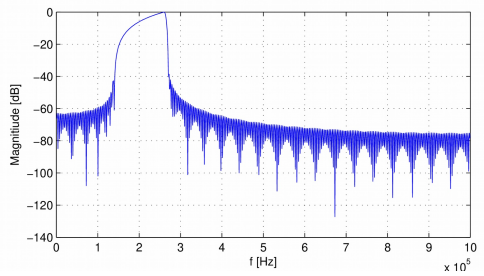

Filtr różniczkujący o wskazanej charakterystyce można uzyskać ,,składając'' dwa filtry: różniczkujący w całym paśmie i pasmowo-przepustowy (jego odpowiedź impulsowa jest wówczas równa wynikowi splotu odp. impulsowych obu filtrów). Zaprojektuj oba filtry (DIFF i BP) jako cyfrowe filtry FIR. Tłumienie filtru pasmowo-przepustowego powinno wynosić 80 dB. Oblicz wypadkową odp. impulsową kaskady dwóch filtrów. Dokonaj filtracji z jej użyciem. 

**(1pkt)** Opcjonalnie zaprojektuj filtr różniczkujący pasmowo-przepustowy (bez składania z dwóch filtrów) za pomocą funkcji `firls(...)`.

**Trzeci sposób** to modyfikacja drugiej metody, w której pasmowo-przepustowy filtr różniczkujący
zastąpiono kaskadą dwóch oddzielanych filtrów: pasmowo-przepustowego i różniczkującego w całym paśmie częstotliwości.

Wykonaj dekodowanie wszystkimi trzema sposobami. Porównaj wyniki. W ostatniej metodzie porównaj filtr FIR oraz krótki IIR (rząd 4) w roli filtru BP oraz trywialny filtr różniczkujący złożony ze współczynników: `b=[-1,1], a=1;`.

In [ ]:
from scipy.io import loadmat
import gdown

gdown.download('https://drive.google.com/uc?id=1-j3pgMavUQa6mk3MVFl2eoSU8DbKUNEi', 'lab08_fm.mat', quiet=False)
fm = loadmat('lab08_fm.mat')
x = fm['x']